# Multiclasss Classification

## Recognizing Handwritten Digits : Logistic Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

#### Loading datasets

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

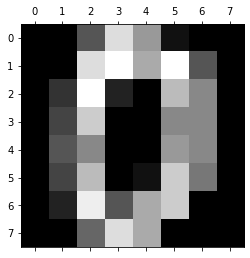

In [5]:
plt.gray()
plt.matshow(digits.images[0])

#### Building the model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=10)

In [8]:
X_train.shape

(1437, 64)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [10]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

#### Predicting values

In [11]:
lr.score(X_test,y_test)

0.9527777777777777

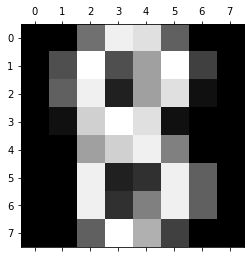

In [12]:
plt.matshow(digits.images[913])

In [13]:
digits.target[913]

8

In [14]:
lr.predict([digits.data[913]])

array([8])

In [15]:
y_predicted = lr.predict(X_test)

### Confusion Matrix
To analyse where our model predicted wrong values.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 38,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

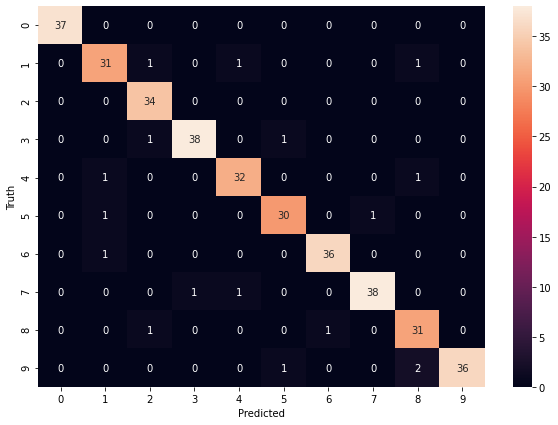

In [18]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The above plot tells us that for what values how many times what value was predicted. Eg for 1 in predicted axis it shows 1 at 6 on Truth axis, i.e it mistook 1 as 6 one time or predicted 1 as 6 one time similary 31 means it predicted 1 31 times when it was actually one.